<a href="https://colab.research.google.com/github/Bakarime27/sea-project/blob/main/nettoyage_exploration_data_sea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Anticipez les besoins en consommation de bâtiments**
Ce projet a pour but d'aider la ville de seattle a atteindre son objectif de ville neutre en émissions de carbone en 2050. En effet la ville s'intéresse de près à la consommation et aux émissions des bâtiments non destinés à l'habitation.  

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

### **1.&nbsp;Description du dataset**

Le dataset contient plus de 3000 lignes, représentant les données structurelles des bâtiments et les données de relevés effectués par les agents de la ville

### **2.&nbsp;Nettoyage des données**

### **2.1.&nbsp; Chargement des données**

In [ ]:
from google.colab import drive
#drive.mount("/gdrive", force_remount=True)
#drive.flush_and_unmount()
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets
%ls

Mounted at /gdrive
/gdrive/MyDrive/Datasets
2016_Building_Energy_Benchmarking.csv  fr.openfoodfacts.org.products.csv
clean-data.csv                         sea-clean-data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',', low_memory=False)

In [ ]:
print(f'Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes')

Le dataset contient 3376 lignes et 46 colonnes


In [ ]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### **2.2.&nbsp;Analyse des colonnes et lignes du dataset**
Nous allons identifier les colonnes qui contiennent le plus de valeurs nulles en regardant le taux de remplissage des variables graphiquement.

In [ ]:
def remplissage(df):
    taux_de_remplissage = (100-(df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
    taux_de_remplissage.columns = ['Variables','Taux_de_remplissage']
    return taux_de_remplissage


In [ ]:
taux_de_remplissage = remplissage(df)
taux_de_remplissage = taux_de_remplissage.sort_values("Taux_de_remplissage", ascending=False)

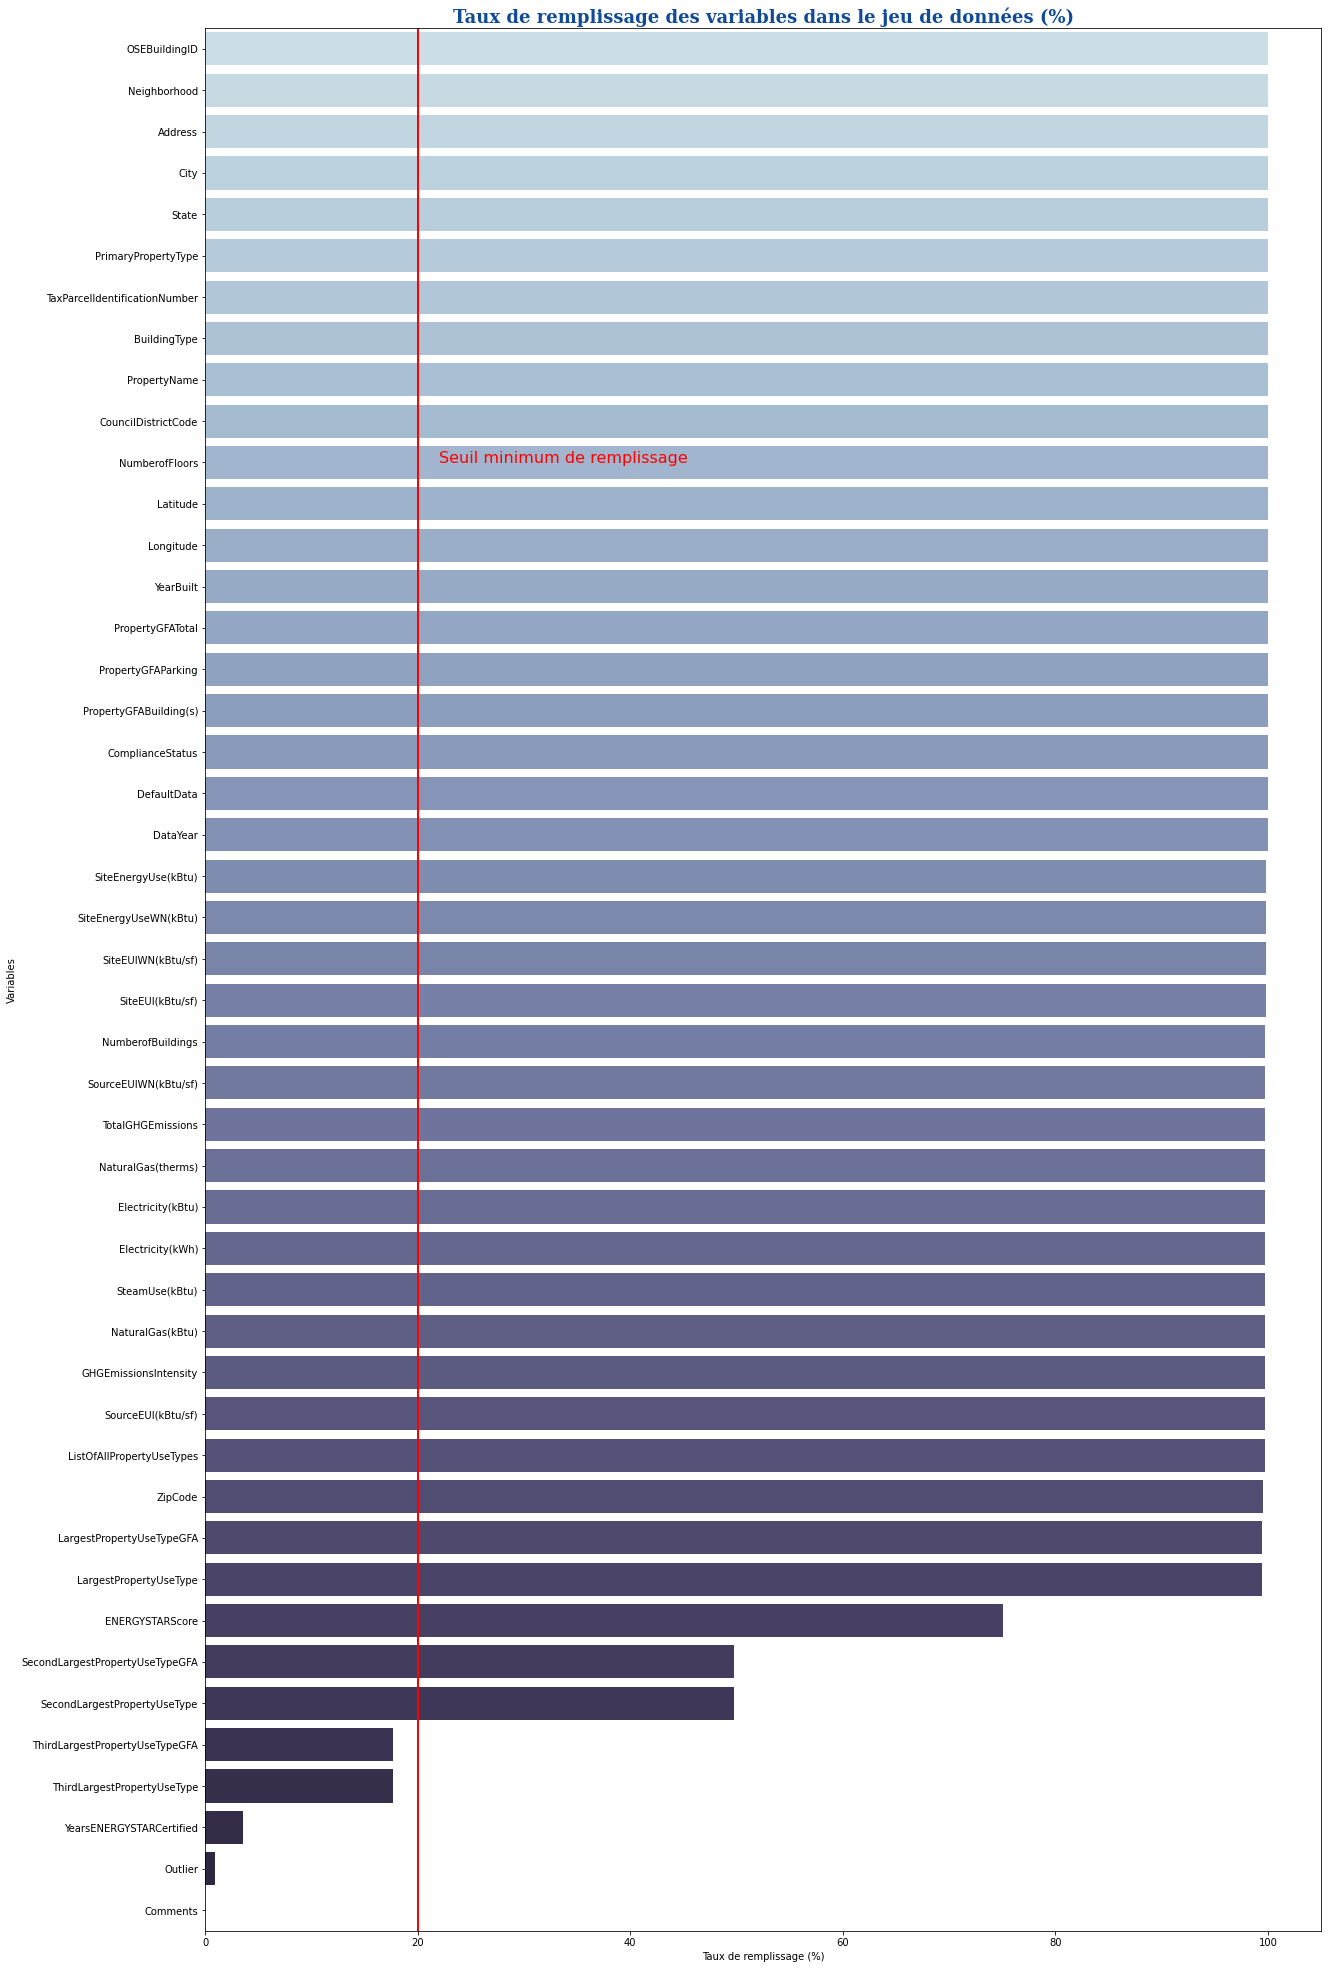

In [ ]:
# Representation graphique

#Seuil de suppression
sup_threshold = 20

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_remplissage", y="Variables", data=taux_de_remplissage, palette="ch:s=.25,rot=-.25")
#Ligne indiquand le seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 10, 'Seuil minimum de remplissage', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.savefig("../images/sea/taux-remplissage.png")
plt.show()

On observe que les colonnes **ThirdLargestPropertyUseType**, **ThirdLargestPropertyUseTypeGFA**, **YearsENERGYSTARCertified**, **Outliers** et **Comments** contienent moins de **20%** de données, nous allons donc supprimer.

In [ ]:
#Dataset avec les variables dont le taux de remplissage est suppérieur au seuil choisi
variable_a_conserver = list(taux_de_remplissage.loc[taux_de_remplissage['Taux_de_remplissage']>sup_threshold, 'Variables'].values)
df = df[variable_a_conserver]
df.head()

,OSEBuildingID,Neighborhood,Address,City,State,PrimaryPropertyType,TaxParcelIdentificationNumber,BuildingType,PropertyName,CouncilDistrictCode,...,NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),ListOfAllPropertyUseTypes,ZipCode,LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore,SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseType
0,1,DOWNTOWN,405 Olive way,Seattle,WA,Hotel,0659000030,NonResidential,Mayflower park hotel,7,...,1276453.0,2.83,182.500000,Hotel,98101.0,88434.0,Hotel,60.0,NaN,NaN
1,2,DOWNTOWN,724 Pine street,Seattle,WA,Hotel,0659000220,NonResidential,Paramount Hotel,7,...,5145082.0,2.86,176.100006,"Hotel, Parking, Restaurant",98101.0,83880.0,Hotel,61.0,15064.0,Parking
2,3,DOWNTOWN,1900 5th Avenue,Seattle,WA,Hotel,0659000475,NonResidential,5673-The Westin Seattle,7,...,1493800.0,2.19,241.899994,Hotel,98101.0,756493.0,Hotel,43.0,NaN,NaN
3,5,DOWNTOWN,620 STEWART ST,Seattle,WA,Hotel,0659000640,NonResidential,HOTEL MAX,7,...,1811213.0,4.67,216.199997,Hotel,98101.0,61320.0,Hotel,56.0,NaN,NaN
4,8,DOWNTOWN,401 LENORA ST,Seattle,WA,Hotel,0659000970,NonResidential,WARWICK SEATTLE HOTEL (ID8),7,...,8803998.0,2.88,211.399994,"Hotel, Parking, Swimming Pool",98121.0,123445.0,Hotel,75.0,68009.0,Parking


In [ ]:
print(f'Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes')

Le dataset contient 3376 lignes et 41 colonnes


Après suppression des colonnes dont le taux de remplissage est inferieur à 20%, il ne reste que 41 colonnes dans notre dataset. Nous allons maintenant analyser les lignes qui ne contiennent que des valeurs nulles

In [ ]:
print(f'Il y a {df.isnull().all(axis=1).sum()} lignes vides dans le dataset')

Il y a 0 lignes vides dans le dataset


Il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable BuildingType

In [ ]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [ ]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [ ]:
print(f'Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes')

Le dataset contient 1668 lignes et 41 colonnes


### **2.3.&nbsp;Variables redondantes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 3375
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   Neighborhood                     1668 non-null   object 
 2   Address                          1668 non-null   object 
 3   City                             1668 non-null   object 
 4   State                            1668 non-null   object 
 5   PrimaryPropertyType              1668 non-null   object 
 6   TaxParcelIdentificationNumber    1668 non-null   object 
 7   BuildingType                     1668 non-null   object 
 8   PropertyName                     1668 non-null   object 
 9   CouncilDistrictCode              1668 non-null   int64  
 10  NumberofFloors                   1668 non-null   int64  
 11  Latitude                         1668 non-null   float64
 12  Longitude           

Dans la visualisation ci-dessus, certaines variables apparaissent déjà comme redondantes :

*   Electricity(kWh) et Electricity(kBtu),
*   NaturalGas(therms) et NaturalGas(kBtu)
*   Les colonnes suffixées WN : "Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte.  

Nous allons donc commencer par supprimer ces variables :

In [ ]:
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col:
        componant.append(col)
  return componant

In [ ]:
#Suppression des variables WN
df.drop(search_componant(df,'WN'), axis=1, inplace=True)

In [ ]:
#Suppression des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
df.drop(redundant_features, axis=1, inplace=True)

On remarque également des variables suffixées GFA : Elles représente la surface au sol (Ground Floor Area). Nous les conservons donc pour la suite des analyses.

In [ ]:
print(f'Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes')

Le dataset contient 1668 lignes et 36 colonnes


### **2.4.&nbsp;Recherche et suppression des doublons**

In [ ]:
#Suppression des doublons en fonction de l'identifiant OSEBuildingID
df.drop_duplicates(subset="OSEBuildingID", keep = 'last', inplace=True)
df.shape

(1668, 36)

Il n y a pas de doublons par ID de bâtiment.

### **2.5.&nbsp;Gestion des valeurs manquantes**

Nous nous intéressons tout d'abord aux variables à prédire que sont la **consommation d'énergie(SiteEnergyUse(kBtu))** et les **émissions de CO2(TotalGHGEmissions)**. Nous allons donc supprimer les lignes manquantes.

In [ ]:
df = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()) | (df['SiteEUI(kBtu/sf)'].isnull()))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1665 non-null   int64  
 1   Neighborhood                     1665 non-null   object 
 2   Address                          1665 non-null   object 
 3   City                             1665 non-null   object 
 4   State                            1665 non-null   object 
 5   PrimaryPropertyType              1665 non-null   object 
 6   TaxParcelIdentificationNumber    1665 non-null   object 
 7   BuildingType                     1665 non-null   object 
 8   PropertyName                     1665 non-null   object 
 9   CouncilDistrictCode              1665 non-null   int64  
 10  NumberofFloors                   1665 non-null   int64  
 11  Latitude                         1665 non-null   float64
 12  Longitude           

Hors mis ces quelques variables (qui seront traitées par la suite): ZipCode, LargestPropertyUseTypeGFA, LargestPropertyUseType, ENERGYSTARScore, SecondLargestPropertyUseTypeGFA, SecondLargestPropertyUseType, toutes les autres ont le même nombre de lignes complètent.

### **2.6.&nbsp;Gestion des valeurs aberrantes**

In [ ]:
df.describe()

,OSEBuildingID,CouncilDistrictCode,NumberofFloors,Latitude,Longitude,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),DataYear,...,TotalGHGEmissions,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),ZipCode,LargestPropertyUseTypeGFA,ENERGYSTARScore,SecondLargestPropertyUseTypeGFA
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1.665000e+03,1665.000000,1.665000e+03,1665.0,...,1665.000000,1.665000e+03,1.665000e+03,1.665000e+03,1665.000000,1665.000000,1649.000000,1.661000e+03,1094.000000,854.000000
mean,16349.120721,4.353754,4.121321,47.616037,-122.332920,1961.939940,1.181656e+05,12921.218619,1.052444e+05,2016.0,...,185.084396,5.847002e+06,5.128804e+05,1.972028e+06,1.608811,175.935496,98116.844148,9.817875e+04,65.449726,36043.099879
std,13834.748505,2.191088,6.568953,0.048198,0.024598,32.740273,2.959547e+05,42309.051377,2.826828e+05,0.0,...,752.188245,2.080248e+07,5.515586e+06,9.373504e+06,2.337252,185.937997,18.437986,2.757611e+05,28.492928,66244.030136
min,1.000000,1.000000,0.000000,47.499170,-122.411820,1900.000000,1.128500e+04,0.000000,3.636000e+03,2016.0,...,-0.800000,-1.154170e+05,0.000000e+00,0.000000e+00,-0.020000,0.000000,98006.000000,5.656000e+03,1.000000,0.000000
25%,583.000000,2.000000,1.000000,47.585420,-122.343280,1930.000000,2.949800e+04,0.000000,2.849200e+04,2016.0,...,20.080000,7.224670e+05,0.000000e+00,0.000000e+00,0.350000,76.599998,98105.000000,2.552100e+04,48.000000,5325.000000
50%,21145.000000,4.000000,2.000000,47.612340,-122.332970,1965.000000,4.928000e+04,0.000000,4.736800e+04,2016.0,...,49.580000,1.612547e+06,0.000000e+00,4.995090e+05,0.880000,131.000000,98109.000000,4.372800e+04,73.000000,12000.000000
75%,24602.000000,7.000000,4.000000,47.649650,-122.321710,1989.000000,1.051000e+05,0.000000,9.471300e+04,2016.0,...,142.390000,4.855036e+06,0.000000e+00,1.522434e+06,1.890000,204.000000,98125.000000,9.193500e+04,89.000000,31820.250000
max,50226.000000,7.000000,99.000000,47.733870,-122.258640,2015.000000,9.320156e+06,512608.000000,9.320156e+06,2016.0,...,16870.980000,6.570744e+08,1.349435e+08,2.979090e+08,34.090000,2620.000000,98199.000000,9.320156e+06,100.000000,639931.000000


Il y a un bâtiment avec une consommation d'électricité et des émission de gaz CO2 de valeurs négatives, ce sont clairement des valeurs abérrantes, nous allons donc supprimer

In [ ]:
df_= df[['OSEBuildingID','PropertyName','PrimaryPropertyType','BuildingType','YearBuilt','ListOfAllPropertyUseTypes','NumberofFloors','NumberofBuildings','Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)','SiteEnergyUse(kBtu)','TotalGHGEmissions']]
df_[df_['Electricity(kBtu)'].le(0)]

,OSEBuildingID,PropertyName,PrimaryPropertyType,BuildingType,YearBuilt,ListOfAllPropertyUseTypes,NumberofFloors,NumberofBuildings,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),TotalGHGEmissions
28,34,Meany Building,K-12 School,SPS-District K-12,1955,K-12 School,1,1.0,0.0,0.0,0.0,0.000000e+00,0.00
133,217,Whitman Middle,K-12 School,SPS-District K-12,1959,K-12 School,1,1.0,0.0,4318917.0,0.0,0.000000e+00,229.38
139,227,Washington Middle,K-12 School,SPS-District K-12,1963,K-12 School,3,1.0,0.0,3217877.0,0.0,0.000000e+00,170.90
152,242,Olympic View Elementary,K-12 School,SPS-District K-12,1989,K-12 School,2,1.0,0.0,0.0,0.0,0.000000e+00,0.00
426,23854,Pier 57,Restaurant,NonResidential,1900,Restaurant,1,1.0,0.0,11508035.0,0.0,1.150804e+07,611.19
513,700,IUC- Whole Foods Interbay,Supermarket / Grocery Store,NonResidential,2008,"Personal Services (Health/Beauty, Dry Cleaning...",1,1.0,0.0,0.0,0.0,1.252517e+07,0.00
746,19776,Welcome Home Society - PriceCo,Other,NonResidential,2002,Other - Education,1,1.0,0.0,0.0,0.0,0.000000e+00,0.00
1361,21616,Olympic Hills Elementary,K-12 School,SPS-District K-12,1954,K-12 School,1,1.0,0.0,0.0,0.0,0.000000e+00,0.00
1894,23722,North Beach Elementary,K-12 School,SPS-District K-12,1958,K-12 School,1,1.0,0.0,945537.0,0.0,0.000000e+00,50.22
3166,49703,Catharine Blaine K-8,K-12 School,SPS-District K-12,1952,K-12 School,1,1.0,0.0,4993620.0,0.0,0.000000e+00,265.21


In [ ]:
df_[df_['TotalGHGEmissions'].le(0)]

,OSEBuildingID,PropertyName,PrimaryPropertyType,BuildingType,YearBuilt,ListOfAllPropertyUseTypes,NumberofFloors,NumberofBuildings,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),TotalGHGEmissions
28,34,Meany Building,K-12 School,SPS-District K-12,1955,K-12 School,1,1.0,0.0,0.0,0.0,0.000000e+00,0.0
152,242,Olympic View Elementary,K-12 School,SPS-District K-12,1989,K-12 School,2,1.0,0.0,0.0,0.0,0.000000e+00,0.0
513,700,IUC- Whole Foods Interbay,Supermarket / Grocery Store,NonResidential,2008,"Personal Services (Health/Beauty, Dry Cleaning...",1,1.0,0.0,0.0,0.0,1.252517e+07,0.0
746,19776,Welcome Home Society - PriceCo,Other,NonResidential,2002,Other - Education,1,1.0,0.0,0.0,0.0,0.000000e+00,0.0
1361,21616,Olympic Hills Elementary,K-12 School,SPS-District K-12,1954,K-12 School,1,1.0,0.0,0.0,0.0,0.000000e+00,0.0
3206,49784,Bullitt Center,Small- and Mid-Sized Office,NonResidential,2013,Office,6,1.0,-115417.0,0.0,0.0,3.427261e+05,-0.8


In [ ]:
df = df[df['Electricity(kBtu)'].gt(0) & df['TotalGHGEmissions'].gt(0)]
df.describe()

,OSEBuildingID,CouncilDistrictCode,NumberofFloors,Latitude,Longitude,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),DataYear,...,TotalGHGEmissions,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),ZipCode,LargestPropertyUseTypeGFA,ENERGYSTARScore,SecondLargestPropertyUseTypeGFA
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1.654000e+03,1654.000000,1.654000e+03,1654.0,...,1654.000000,1.654000e+03,1.654000e+03,1.654000e+03,1654.000000,1654.000000,1638.000000,1.650000e+03,1091.000000,853.000000
mean,16343.053809,4.348247,4.137243,47.615742,-122.332850,1961.896614,1.184335e+05,13007.151753,1.054263e+05,2016.0,...,185.513555,5.885958e+06,5.162914e+05,1.970038e+06,1.607310,176.937304,98116.771673,9.832216e+04,65.417965,36067.769398
std,13800.469889,2.193789,6.586749,0.048073,0.024502,32.746282,2.968972e+05,42436.416604,2.835896e+05,0.0,...,754.520697,2.086607e+07,5.533748e+06,9.400410e+06,2.323065,186.035149,18.365072,2.766484e+05,28.474573,66278.969065
min,1.000000,1.000000,0.000000,47.499170,-122.411820,1900.000000,1.128500e+04,0.000000,3.636000e+03,2016.0,...,0.120000,3.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,98006.000000,5.656000e+03,1.000000,0.000000
25%,584.250000,2.000000,1.000000,47.585197,-122.343225,1930.000000,2.939550e+04,0.000000,2.837525e+04,2016.0,...,20.135000,7.294170e+05,0.000000e+00,0.000000e+00,0.350000,77.425001,98105.000000,2.550000e+04,48.000000,5300.000000
50%,21147.500000,4.000000,2.000000,47.612315,-122.332955,1965.000000,4.925050e+04,0.000000,4.725100e+04,2016.0,...,49.600000,1.632788e+06,0.000000e+00,5.016370e+05,0.880000,131.449997,98109.000000,4.363800e+04,73.000000,12000.000000
75%,24602.750000,7.000000,4.000000,47.649400,-122.321755,1989.000000,1.049922e+05,0.000000,9.449300e+04,2016.0,...,142.257500,4.890860e+06,0.000000e+00,1.510051e+06,1.897500,204.100006,98124.750000,9.161675e+04,89.000000,31845.000000
max,50226.000000,7.000000,99.000000,47.733870,-122.258640,2015.000000,9.320156e+06,512608.000000,9.320156e+06,2016.0,...,16870.980000,6.570744e+08,1.349435e+08,2.979090e+08,34.090000,2620.000000,98199.000000,9.320156e+06,100.000000,639931.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1654 non-null   int64  
 1   Neighborhood                     1654 non-null   object 
 2   Address                          1654 non-null   object 
 3   City                             1654 non-null   object 
 4   State                            1654 non-null   object 
 5   PrimaryPropertyType              1654 non-null   object 
 6   TaxParcelIdentificationNumber    1654 non-null   object 
 7   BuildingType                     1654 non-null   object 
 8   PropertyName                     1654 non-null   object 
 9   CouncilDistrictCode              1654 non-null   int64  
 10  NumberofFloors                   1654 non-null   int64  
 11  Latitude                         1654 non-null   float64
 12  Longitude           

### **2.6.&nbsp;Analyse exploratoire**

**Répartition type de bâtiments**

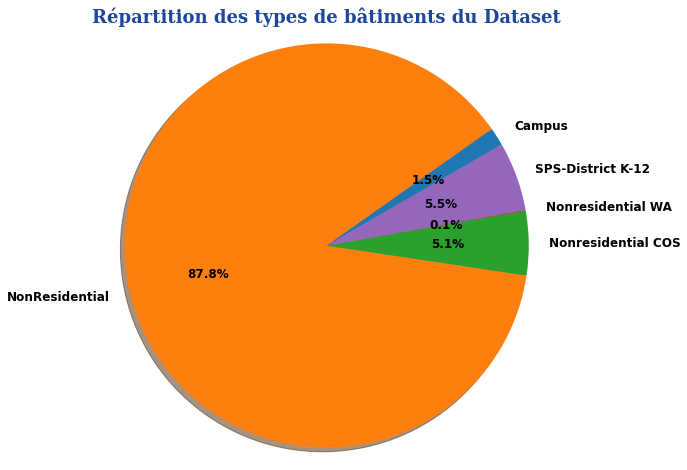

In [ ]:
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index,
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.savefig("../images/sea/repartition-type-batiments.png")
plt.show()

La majeur partie des bâtiments sont de type **"NonResidential"**. Nous pouvons visualiser les diverses catégories représentées dans ce type de bâtiments :

In [ ]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    286
Other                          183
Warehouse                      180
Large Office                   168
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     39
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Restaurant                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

Les bureaux de toutes tailles représentent la plus grande part des bâtiments non résidentiels.  
Nous allons maintenant visualiser l'age des bâtiments qui est plus pertinant que l'année de construction, cela permet également de lier l'année des rélevés

**Distribution âge des batiments**

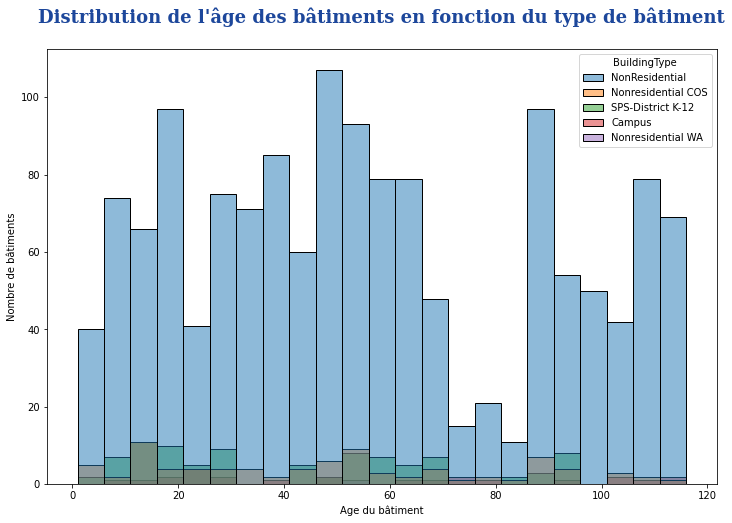

In [ ]:
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5), hue='BuildingType')
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments en fonction du type de bâtiment\n", fontdict=font_title)
plt.savefig("../images/sea/distribution-age-batiments.png")
plt.show()

On constate que le nombre de bâtiments qui ont entre 70 et 85 ans sont moins nombreux que les autres, nous allons maintenant nous intéresser à l'impact de l'age du bâtiment.

In [ ]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

bins = pd.IntervalIndex.from_tuples([(1, 10), (10, 20), (20, 30), (30, 40), (40, 50),
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100),
                                     (100,110), (110,120)])
df['BuildingAgeBins'] = pd.cut(df['BuildingAge'], bins=bins)


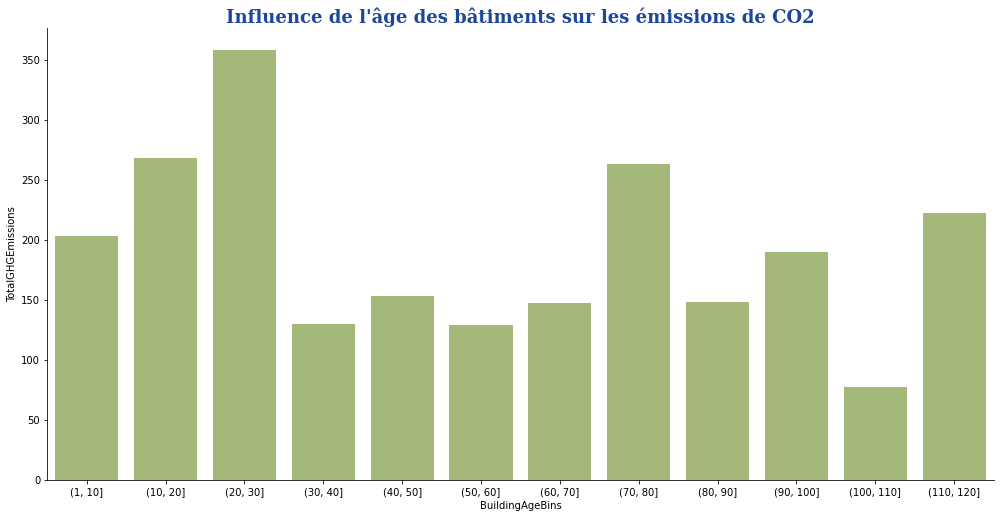

In [ ]:
sns.catplot(
    data=df, kind="bar",
    x='BuildingAgeBins', y='TotalGHGEmissions',
    ci=None, color="#6D9C0E", alpha=.6, height=7, aspect=2)

plt.title("Influence de l'âge des bâtiments sur les émissions de CO2", fontdict=font_title)
plt.savefig("../images/sea/age-batiment-emissions-co2.png")
plt.show()

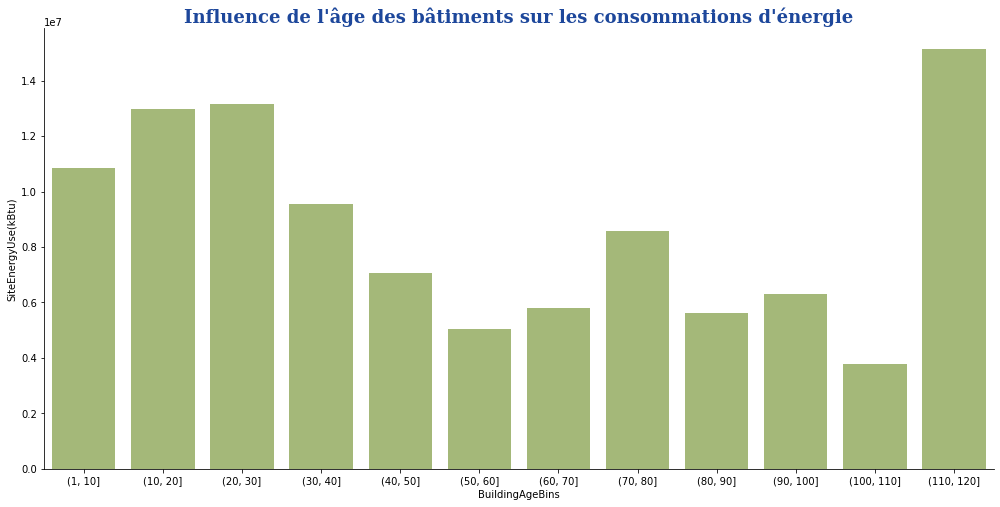

In [ ]:
sns.catplot(
    data=df, kind="bar",
    x='BuildingAgeBins', y="SiteEnergyUse(kBtu)",
    ci=None, color="#6D9C0E", alpha=.6, height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie", fontdict=font_title)
plt.savefig("../images/sea/age-batiment-consommation-energie.png")
plt.show()

Les bâtiments de moins de 30 ans semblent avoir des consommations d'énergie et rejets de CO2 plus important que les buildings anciens.  
Nous allons à présent regarder la répartition de ces 2 variables en fonction du type de bâtiement.

Nous allons supprimer 'BuildingAgeBins'

In [ ]:
df.drop('BuildingAgeBins', axis=1,inplace=True)

Nous allons maintenant observer la repartition de la consommation d'énergie et des émissions de CO2 en fonction du type de bâtiment

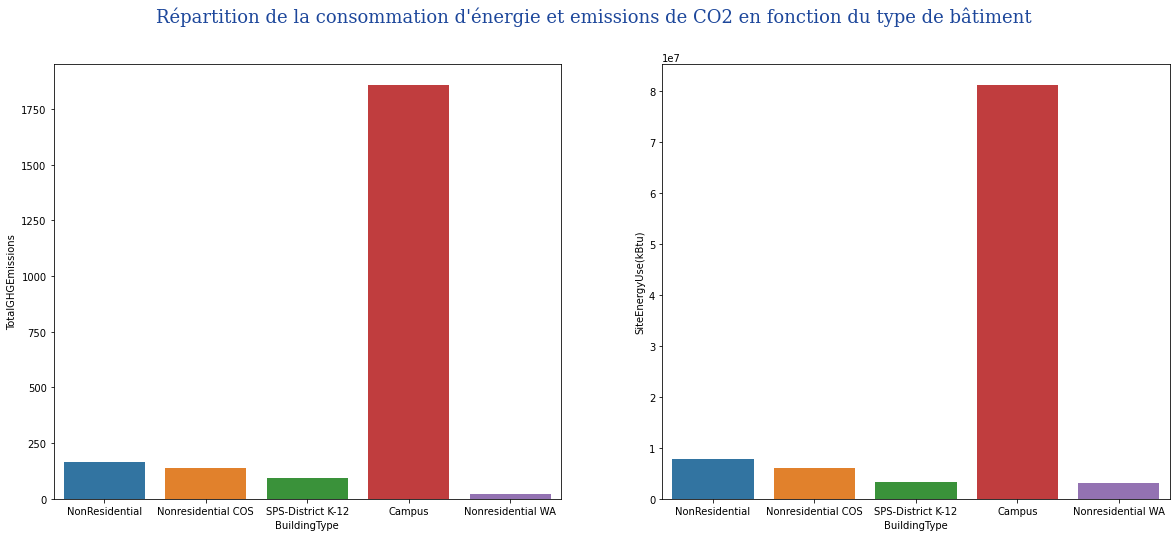

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=df, ax=axes[0],ci=None)
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=df, ax=axes[1],ci=None)
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment",
             fontdict=font_title, fontsize=18)
plt.savefig("../images/sea/repartition-consommation-energie-emissions-co2.png")
plt.show()

On peut voir que les campus sont largement les bâtiments qui consomment le plus d'énergie et emettent le plus de CO2

**Correlations linéaires**

In [ ]:
#Selection des colonnes numeriques
colonnes = list(df.columns)
colonnes.remove('OSEBuildingID')
colonnes.remove('TaxParcelIdentificationNumber')
colonnes.remove('CouncilDistrictCode')
colonnes.remove('DataYear')
colonnes.remove('ZipCode')
df_colonnes = df[colonnes]

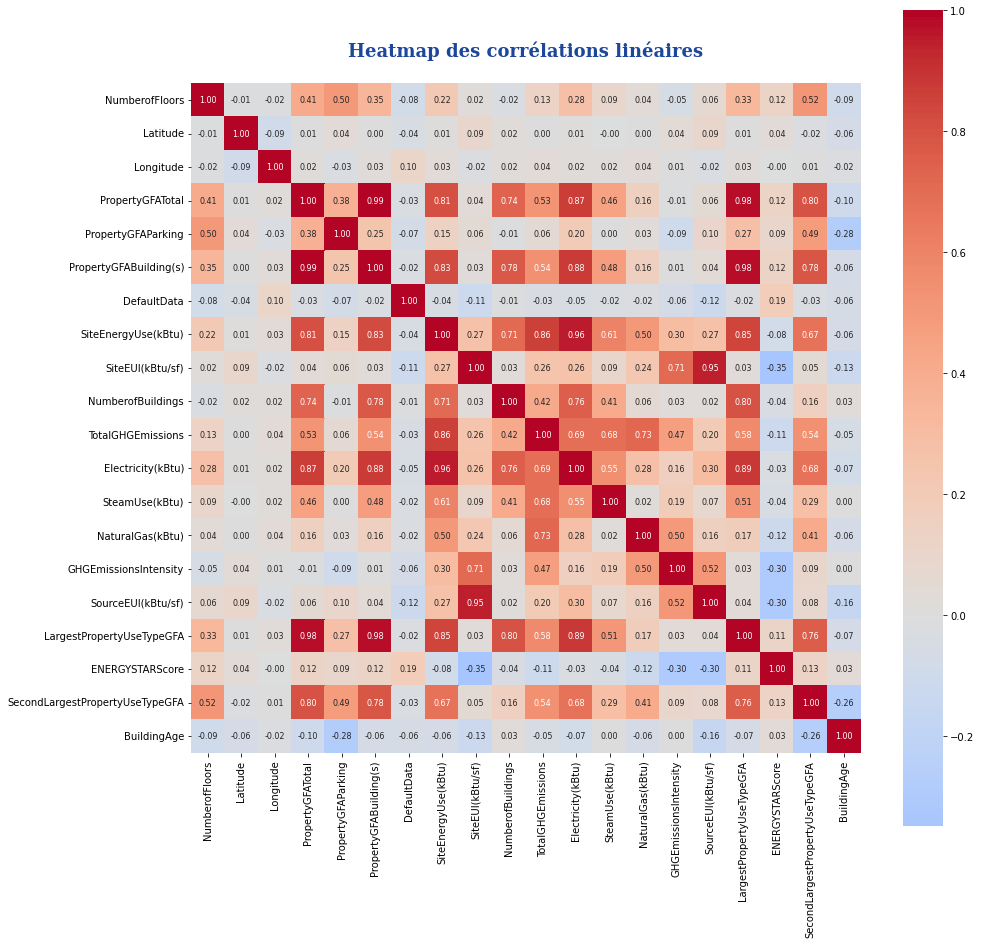

In [ ]:

corr = df_colonnes.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, square=True, annot=True, fmt=".2f", annot_kws={'size':8},
                 center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n",
          fontdict=font_title)
plt.savefig("../images/sea/correlations1.png")
plt.show()

On observe que les variables à prédire (TotalGHGEmissions et SiteEnergyUse(kBtu)) ont  des corrélations linéaires quasi similaires à celles des variables de relevés (Electricity(kBtu), SteamUse(kBtu) et NaturalGas(kBtu)).  

Nous allons maintenant isoler les paires de variables avec des corrélations supérieures à 0.7


In [ ]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
42,PropertyGFATotal,PropertyGFABuilding(s),0.990357
40,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.982383
38,PropertyGFATotal,LargestPropertyUseTypeGFA,0.977634
36,Electricity(kBtu),SiteEnergyUse(kBtu),0.956337
34,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.951103
32,LargestPropertyUseTypeGFA,Electricity(kBtu),0.888266
30,Electricity(kBtu),PropertyGFABuilding(s),0.878216
28,Electricity(kBtu),PropertyGFATotal,0.867517
26,TotalGHGEmissions,SiteEnergyUse(kBtu),0.860086
24,SiteEnergyUse(kBtu),LargestPropertyUseTypeGFA,0.845990


On remarque également que les variables suffixées GFA présentent de fortes corrélations avec plusieurs autres variables. Nous allons donc créer de nouvelles variables pour tenter de gommer ces corrélations linéaires

In [ ]:
def split_words(df, column = None):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

list_use_type = split_words(df, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 115


Nous allons créer une variable nous donnant le nombre total de type d'usage du bâtiment, puis supprimer la liste complète des usages

In [ ]:
df['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in df['ListOfAllPropertyUseTypes'].str.split(',')]
df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et nous conserverons uniquement ces 2 variables en supprimant les variables LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA (ThirdLargestPropertyUseTypeGFA ayant déjà été supprimé):

In [ ]:
gfa_features = search_componant(df, suffix='GFA')
df[['TotalUseTypeNumber'] + gfa_features].head(10)

,TotalUseTypeNumber,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA
0,1,88434,0,88434,88434.0,NaN
1,3,103566,15064,88502,83880.0,15064.0
2,1,956110,196718,759392,756493.0,NaN
3,1,61320,0,61320,61320.0,NaN
4,3,175580,62000,113580,123445.0,68009.0
5,1,97288,37198,60090,88830.0,NaN
6,1,83008,0,83008,81352.0,NaN
7,1,102761,0,102761,102761.0,NaN
8,1,163984,0,163984,163984.0,NaN
10,1,153163,19279,133884,133884.0,NaN


In [ ]:
#On calcule les ratios
df['GFABuildingRate'] = (round((df['PropertyGFABuilding(s)']
                                  /df['PropertyGFATotal']),5))
df['GFAParkingRate'] = (round((df['PropertyGFAParking']
                                 /df['PropertyGFATotal']),5))

#On supprime les variables inutiles
df.drop(['LargestPropertyUseTypeGFA',
         'LargestPropertyUseType',
         'SecondLargestPropertyUseTypeGFA',
         'SecondLargestPropertyUseType',
         'PropertyGFAParking',
         'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

Nous pouvons également calculer la surface moyenne par bâtiment et par étage :

In [ ]:
df['GFAPerBuilding'] = round((df['PropertyGFATotal'] / df['NumberofBuildings']),3)
df['GFAPerFloor'] = round((df['PropertyGFATotal'] / df['NumberofFloors']),3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 3375
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1654 non-null   int64  
 1   Neighborhood                   1654 non-null   object 
 2   Address                        1654 non-null   object 
 3   City                           1654 non-null   object 
 4   State                          1654 non-null   object 
 5   PrimaryPropertyType            1654 non-null   object 
 6   TaxParcelIdentificationNumber  1654 non-null   object 
 7   BuildingType                   1654 non-null   object 
 8   PropertyName                   1654 non-null   object 
 9   CouncilDistrictCode            1654 non-null   int64  
 10  NumberofFloors                 1654 non-null   int64  
 11  Latitude                       1654 non-null   float64
 12  Longitude                      1654 non-null   f

In [ ]:
df.describe()

,OSEBuildingID,CouncilDistrictCode,NumberofFloors,Latitude,Longitude,PropertyGFATotal,DataYear,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,...,GHGEmissionsIntensity,SourceEUI(kBtu/sf),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1.654000e+03,1654.0,1.654000e+03,1654.000000,1654.000000,...,1654.000000,1654.000000,1638.000000,1091.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.0,1654.00000
mean,16343.053809,4.348247,4.137243,47.615742,-122.332850,1.184335e+05,2016.0,8.484414e+06,72.349033,1.169891,...,1.607310,176.937304,98116.771673,65.417965,54.103386,1.899033,0.938369,0.061631,inf,inf
std,13800.469889,2.193789,6.586749,0.048073,0.024502,2.968972e+05,0.0,3.034605e+07,73.881273,2.941994,...,2.323065,186.035149,18.365072,28.474573,32.746282,1.222431,0.140554,0.140554,NaN,NaN
min,1.000000,1.000000,0.000000,47.499170,-122.411820,1.128500e+04,2016.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,98006.000000,1.000000,1.000000,1.000000,0.104980,0.000000,4300.0,221.69700
25%,584.250000,2.000000,1.000000,47.585197,-122.343225,2.939550e+04,2016.0,1.245372e+06,33.925001,1.000000,...,0.350000,77.425001,98105.000000,48.000000,27.000000,1.000000,1.000000,0.000000,28845.0,13283.13750
50%,21147.500000,4.000000,2.000000,47.612315,-122.332955,4.925050e+04,2016.0,2.572873e+06,52.049999,1.000000,...,0.880000,131.449997,98109.000000,73.000000,51.000000,2.000000,1.000000,0.000000,49289.5,22870.00000
75%,24602.750000,7.000000,4.000000,47.649400,-122.321755,1.049922e+05,2016.0,6.917429e+06,81.699997,1.000000,...,1.897500,204.100006,98124.750000,89.000000,86.000000,2.000000,1.000000,0.000000,110482.0,37969.49975
max,50226.000000,7.000000,99.000000,47.733870,-122.258640,9.320156e+06,2016.0,8.739237e+08,834.400024,111.000000,...,34.090000,2620.000000,98199.000000,100.000000,116.000000,13.000000,1.000000,0.895020,inf,inf


Dans cette description, on remarque des données avec des valeurs infinies, nous allons les corriger

In [ ]:
df[(df.GFAPerBuilding == np.inf) | (df.GFAPerFloor == np.inf)].head()

,OSEBuildingID,Neighborhood,Address,City,State,PrimaryPropertyType,TaxParcelIdentificationNumber,BuildingType,PropertyName,CouncilDistrictCode,...,GHGEmissionsIntensity,SourceEUI(kBtu/sf),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
63,89,EAST,1200 Harvard Ave,Seattle,WA,Medical Office,1978201270,NonResidential,Polyclinic North && South,3,...,2.41,213.399994,98122.0,48.0,51,1,1.00000,0.00000,inf,59671.333
76,113,MAGNOLIA / QUEEN ANNE,401 Mercer St,Seattle,WA,Small- and Mid-Sized Office,1988200705,NonResidential,KCTS9,7,...,0.44,235.199997,98109.0,NaN,30,5,0.96449,0.03551,inf,33120.000
160,257,GREATER DUWAMISH,3235 16TH AVE SW,Seattle,WA,Warehouse,7666703020,NonResidential,Harbor Island: Warehouse E - DNRP-SWD,1,...,0.21,95.099998,98134.0,34.0,100,1,1.00000,0.00000,inf,19900.000
166,267,DOWNTOWN,721 Pine St,Seattle,WA,Hotel,6792120000,NonResidential,Grand Hyatt Seattle,7,...,1.75,272.899994,98101.0,NaN,17,5,1.00000,0.00000,934292.0,inf
201,322,DOWNTOWN,2801 3rd Ave,Seattle,WA,Large Office,0656000005,NonResidential,Cox Media Group Seattle KIRO TV (322),7,...,0.68,305.100006,98121.0,20.0,48,1,0.73464,0.26536,inf,33578.000


In [ ]:
df['GFAPerBuilding'] = np.where(((df.GFAPerBuilding == np.inf) & (df.NumberofBuildings == 0)),0, df.GFAPerBuilding)
df['GFAPerFloor'] = np.where(((df.GFAPerFloor == np.inf) & (df.NumberofFloors == 0)),0, df.GFAPerFloor)

On vérifie que les valeurs infinies ont bien été supprimées du dataset

In [ ]:
df.describe()

,OSEBuildingID,CouncilDistrictCode,NumberofFloors,Latitude,Longitude,PropertyGFATotal,DataYear,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,...,GHGEmissionsIntensity,SourceEUI(kBtu/sf),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1.654000e+03,1654.0,1.654000e+03,1654.000000,1654.000000,...,1654.000000,1654.000000,1638.000000,1091.000000,1654.000000,1654.000000,1654.000000,1654.000000,1.654000e+03,1.654000e+03
mean,16343.053809,4.348247,4.137243,47.615742,-122.332850,1.184335e+05,2016.0,8.484414e+06,72.349033,1.169891,...,1.607310,176.937304,98116.771673,65.417965,54.103386,1.899033,0.938369,0.061631,1.031956e+05,3.333333e+04
std,13800.469889,2.193789,6.586749,0.048073,0.024502,2.968972e+05,0.0,3.034605e+07,73.881273,2.941994,...,2.323065,186.035149,18.365072,28.474573,32.746282,1.222431,0.140554,0.140554,1.799246e+05,4.737513e+04
min,1.000000,1.000000,0.000000,47.499170,-122.411820,1.128500e+04,2016.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,98006.000000,1.000000,1.000000,1.000000,0.104980,0.000000,0.000000e+00,0.000000e+00
25%,584.250000,2.000000,1.000000,47.585197,-122.343225,2.939550e+04,2016.0,1.245372e+06,33.925001,1.000000,...,0.350000,77.425001,98105.000000,48.000000,27.000000,1.000000,1.000000,0.000000,2.748175e+04,1.296438e+04
50%,21147.500000,4.000000,2.000000,47.612315,-122.332955,4.925050e+04,2016.0,2.572873e+06,52.049999,1.000000,...,0.880000,131.449997,98109.000000,73.000000,51.000000,2.000000,1.000000,0.000000,4.572500e+04,2.254450e+04
75%,24602.750000,7.000000,4.000000,47.649400,-122.321755,1.049922e+05,2016.0,6.917429e+06,81.699997,1.000000,...,1.897500,204.100006,98124.750000,89.000000,86.000000,2.000000,1.000000,0.000000,9.727325e+04,3.737050e+04
max,50226.000000,7.000000,99.000000,47.733870,-122.258640,9.320156e+06,2016.0,8.739237e+08,834.400024,111.000000,...,34.090000,2620.000000,98199.000000,100.000000,116.000000,13.000000,1.000000,0.895020,2.200000e+06,1.100000e+06


Nous allons vérifier l'impact de ce feature engineering sur la matrice des corrélations linéaires :

In [ ]:
#Selection des colonnes numeriques
colonnes = list(df.columns)
colonnes.remove('OSEBuildingID')
colonnes.remove('TaxParcelIdentificationNumber')
colonnes.remove('CouncilDistrictCode')
colonnes.remove('DataYear')
colonnes.remove('ZipCode')
df_colonnes = df[colonnes]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 3375
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1654 non-null   int64  
 1   Neighborhood                   1654 non-null   object 
 2   Address                        1654 non-null   object 
 3   City                           1654 non-null   object 
 4   State                          1654 non-null   object 
 5   PrimaryPropertyType            1654 non-null   object 
 6   TaxParcelIdentificationNumber  1654 non-null   object 
 7   BuildingType                   1654 non-null   object 
 8   PropertyName                   1654 non-null   object 
 9   CouncilDistrictCode            1654 non-null   int64  
 10  NumberofFloors                 1654 non-null   int64  
 11  Latitude                       1654 non-null   float64
 12  Longitude                      1654 non-null   f

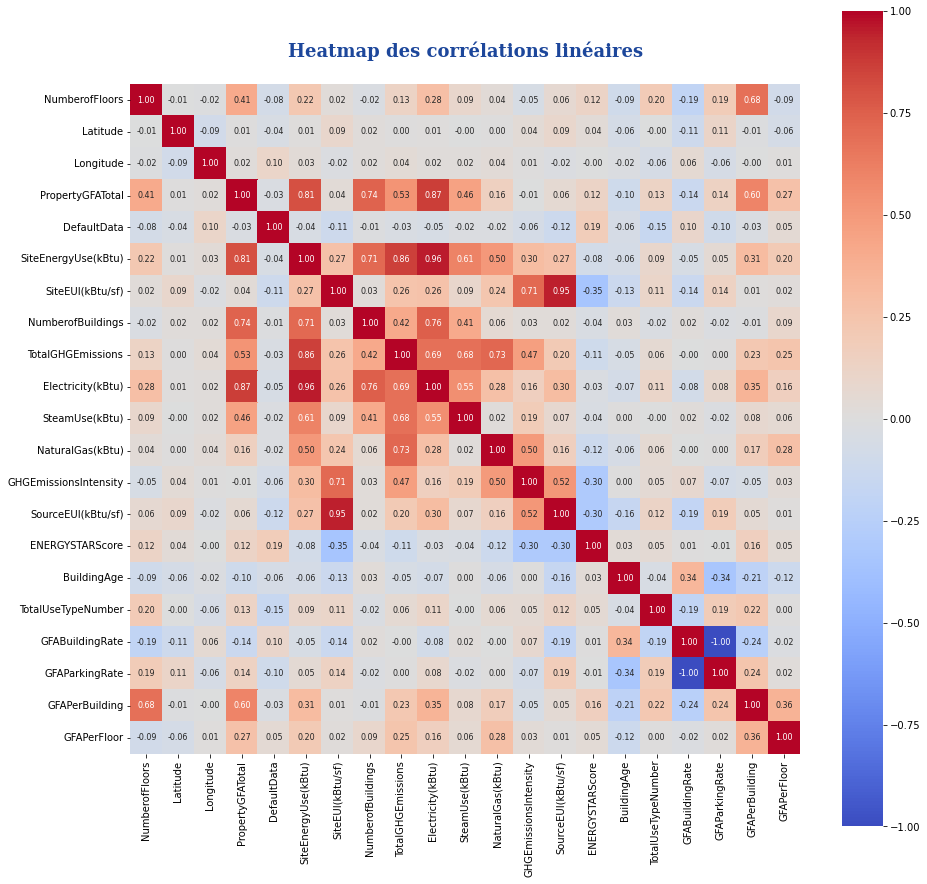

In [ ]:
corr = df_colonnes.corr()
''' mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True '''
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, square=True, annot=True, fmt=".2f", annot_kws={'size':8},
                  center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n",
          fontdict=font_title)
plt.savefig("../images/sea/correlations2.png")
plt.show()

En créant de nouvelles variables, nous avons réussi à gommer les fortes correlations qui existaient entre les variables contenant GFA et les autres variables.  

On peut revérifier les paires de variables avec des corrélations supérieurs à 0.7

In [ ]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
20,SiteEnergyUse(kBtu),Electricity(kBtu),0.956337
18,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.951103
16,Electricity(kBtu),PropertyGFATotal,0.867517
14,TotalGHGEmissions,SiteEnergyUse(kBtu),0.860086
12,SiteEnergyUse(kBtu),PropertyGFATotal,0.809570
10,NumberofBuildings,Electricity(kBtu),0.757636
8,PropertyGFATotal,NumberofBuildings,0.738863
6,NaturalGas(kBtu),TotalGHGEmissions,0.725904
4,SiteEnergyUse(kBtu),NumberofBuildings,0.713069
2,GHGEmissionsIntensity,SiteEUI(kBtu/sf),0.712251


Les features suffixées EUI(kBtu/sf), sont des variables dont les valeurs sont ramenées à la surface par étage. Nous allons les supprimer car nous avons créer des variables pouvant permettre de ramener nos données à l'étage ou au building. Idem pour la variable GHGEmissionsIntensity

In [ ]:
Eui_features = search_componant(df, suffix='EUI(kBtu/sf)') + ['GHGEmissionsIntensity']
df.drop(Eui_features, axis=1, inplace=True)

Vérifions la variable ComplianceStatus qui représente la conformité des données relevées :

In [ ]:
df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [ ]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(df[df['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 109.


Nous conservons que les variables conformes

In [ ]:
df = df[df['ComplianceStatus'] == "Compliant"]

Nous allons ensuite supprimer les variables DefaultData, ComplianceStatus, TaxParcelIdentificationNumber, CouncilDistrictCode, City

In [ ]:
df = df.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)

Nous souhaitons à présent vérifier si les coordonnées géographiques ont un impact sur les rejets et consommations. Pour cela au lieu d'utiliser la Latitude et les Longitude, il est plus intéressant de considérer la distance entre chaque point et le centre de la ville de Seattle.  

Nous aloons utiliser la distance de Haversine, qui permet de calculer la plus courte distance entre deux points sur une sphère à partir de leur longitude et latitude, cette distance est très utilisée dans la navigation

In [ ]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles

    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])

    # Formule Haversine
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))

    return d


In [ ]:
#Calcul des distance au centre de Seattle pour chaque point
df['haversine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y)
                              for x, y in zip(df.Latitude.astype(float), df.Longitude.astype(float))]

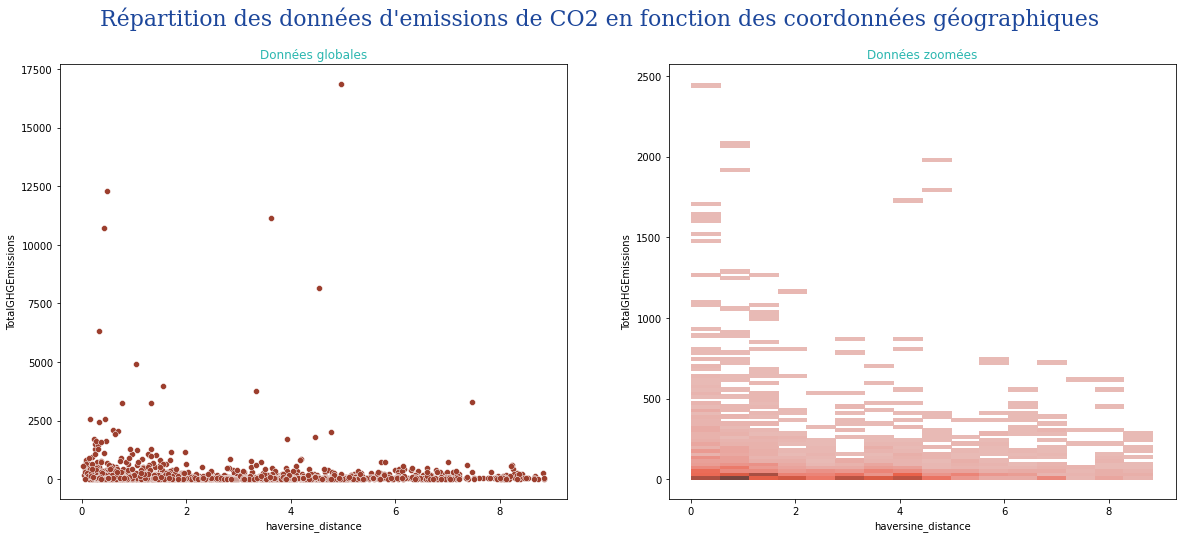

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, y="TotalGHGEmissions", x="haversine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=df[(df['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions",
                x="haversine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques",
             fontdict=font_title, fontsize=22)
plt.show()

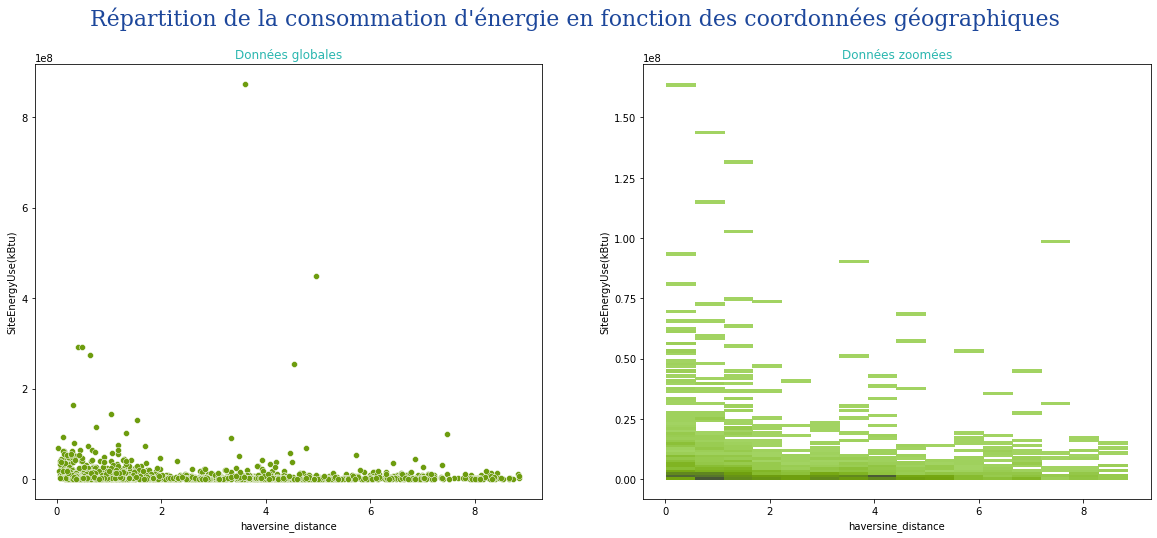

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, y="SiteEnergyUse(kBtu)", x="haversine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=df[(df['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)",
                x="haversine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition de la consommation d'énergie en fonction des coordonnées géographiques",
             fontdict=font_title, fontsize=22)
plt.show()

On constate que les coordonnées géographiques semblent avoir un impact sur la consommation et les rejets. Nous allons donc conserver la variable haversine_distance et supprimer les variables Latitude et Longitude

In [ ]:
df = df.drop(['Latitude','Longitude'], axis=1)

In [ ]:
df.set_index("OSEBuildingID").to_csv("sea-clean-data.csv")